## Code for Venezuela

### Import Packages

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
import os
import pandas_profiling as pp
import missingno as msno

### Load original dataset

In [2]:
df = pd.read_csv("med_translated.csv", encoding='latin') 
df.tail(2)

,s_no,timestamp,report_week,hospital_code,hospital_type,federal_entity,administrative_entity,power_outage_equipment_failure_specify,power_generator_available,power_outage_mortatility,...,er_staff_non_professional_nurse_day_on_call,er_staff_residents_and_rural_night_on_call,er_staff_specialist_night_on_call,er_staff_mic_night_on_call,op_pavilions_count,er_staff_nurse_night_on_call,er_staff_non_professional_nurse_night_on_call,wash_failure_icu,wash_failure_er,wash_failure_sx
999,815,2020-01-03T19: 08: 57.939Z,52 of 2019,ZUL001,type IV,Zulia,MPPS,NaN,Works between 3 and 5 days,Do not,...,2,4,2,0,2,3,2,"3 to 5 days, with alternate support","3 to 5 days, with alternate support","3 to 5 days, with alternate support"
1000,1001,2019-10-28T17: 05: 21.790Z,43 2019,ZUL001,type IV,Zulia,MPPS,NaN,There does not work,Do not,...,3,4,6,0,1,2,0,There was no water any public day,There was water every day,There was water every day


### Query dataset 

In [ ]:
pp.ProfileReport(df)

In [ ]:
df = pd.read_csv('med_translated.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
# Replace white space with nans
df = df.replace(r'^\s*$', pd.np.nan, regex=True)

### Massage hospital code data

In [3]:
# missing cols
missing = df.isna().sum().sort_values()[-50:].index.values

In [4]:
# Distribution of hospitals
df.hospital_code.value_counts()

BOL000    51
NES000    44
DCA005    41
FAL000    39
DEL000    39
GUA000    38
DCA006    38
SUC000    38
BAR000    37
DCA000    37
VAR000    37
AMA000    37
ARA001    35
DCA002    34
ANZ000    34
POR000    34
DCA003    33
MON000    33
MIR000    32
DCA004    32
TAC001    31
TAC000    31
Car000    28
APU000    27
CAR001    26
MER000    23
DCA007    22
ZUL001    19
BOL001    17
LAR000    12
DCA001    10
ARA002     9
ZUL000     2
mir001     1
Name: hospital_code, dtype: int64

In [5]:
# Distribution of FEDERAL ENTITYS
df.federal_entity.value_counts()

Dtto Capital     257
BolÃvar           68
TÃ¡chira          62
Carabobo          54
FalcÃ³n           45
Nueva Esparta     45
Aragua            44
Delta Amacuro     39
Sucre             38
GuÃ¡rico          38
Vargas            37
Amazon            37
Barinas           37
Portuguese        34
Anzoategui        34
Monagas           33
Apure             27
MÃ © rida         22
Zulia             21
Miranda           17
Lara              12
Name: federal_entity, dtype: int64

In [6]:
#fix structure of federal entity names . 
df['federal_entity'] = df['federal_entity'].replace('BolÃvar', 'Bolivar')

df['federal_entity'] = df['federal_entity'].replace('TÃ¡chira', 'Tachira')

df['federal_entity'] = df['federal_entity'].replace('FalcÃ³n', 'Falcon')

df['federal_entity'] = df['federal_entity'].replace('GuÃ¡rico', 'Guarico')

df['federal_entity'] = df['federal_entity'].replace('MÃ © rida', 'Merida')

df['federal_entity'] = df['federal_entity'].replace('Amazon', 'Amazonas')

df['federal_entity'] = df['federal_entity'].replace('Portuguese', 'Portuguesa')

In [7]:
#fix structure of mir001. 
df['hospital_code'] = df['hospital_code'].replace('mir001', 'MIR001')


In [8]:
#changing inconsistitencies in federal entity/ hospital code 
if [df['hospital_code'] =='DCA001'] and \
   [df['federal_entity'] != 'Dtto Capital'] :
        [df['federal_entity'] == 'Dtto Capital']
        
if [df['hospital_code'] =='DCA002'] and \
   [df['federal_entity'] != 'Dtto Capital'] :
        [df['federal_entity'] == 'Dtto Capital']

if [df['hospital_code'] =='DCA003'] and \
   [df['federal_entity'] != 'Dtto Capital'] :
        [df['federal_entity'] == 'Dtto Capital']
        
if [df['hospital_code'] =='DCA005'] and \
   [df['federal_entity'] != 'Dtto Capital'] :
        [df['federal_entity'] == 'Dtto Capital']
        
if [df['hospital_code'] =='MER000'] and \
   [df['federal_entity'] != 'Merida'] :
        [df['federal_entity'] == 'Merida']
        
if [df['hospital_code'] =='MIR000'] and \
   [df['federal_entity'] != 'Miranda'] :
        [df['federal_entity'] == 'Miranda']


## Massage Timestamps 

In [9]:
df.timestamp.values

array(['2020-01-13T19: 11: 32.788Z', '2019-06-14T21: 14: 15.397Z',
       '2019-08-25T02: 13: 40.031Z', ..., '2020-02-07T00: 04: 12.918Z',
       '2020-01-03T19: 08: 57.939Z', '2019-10-28T17: 05: 21.790Z'],
      dtype=object)

In [10]:
ts = []
for i in df.timestamp.values:
  ts.append(i.split('T', 1)[0])
  
df['timestamp'] = pd.to_datetime(ts)

In [11]:
# Sort by time and check the missing values
df['timestamp']

0      2020-01-13
1      2019-06-14
2      2019-08-25
3      2019-08-20
4      2020-01-27
          ...    
996    2019-10-13
997    2019-10-20
998    2020-02-07
999    2020-01-03
1000   2019-10-28
Name: timestamp, Length: 1001, dtype: datetime64[ns]

In [12]:
df = df.set_index('timestamp')
df = df.sort_index()

 ### Translate data from Spanish to English and update dataset

In [13]:
# Fix mistakes in translation
df['power_outage'] = df['power_outage'].replace('No Yes', pd.np.nan)
df['power_outage'] = df['power_outage'].replace('Do not', 'No')


In [14]:
df['power_outage_mortatility'].value_counts()

Do not    991
SÃ         10
Name: power_outage_mortatility, dtype: int64

In [15]:
# Fix mistakes in translation
df['power_outage_mortatility'] = df['power_outage_mortatility'].replace('No Yes', pd.np.nan)
df['power_outage_mortatility'] = df['power_outage'].replace('Do not', 'No')
df['power_outage_mortatility'] = df['power_outage'].replace('SĀ', 'Yes')

In [16]:
df['power_outage_mortatility'].value_counts()

Yes    508
No     484
Name: power_outage_mortatility, dtype: int64

### Drop missing values

In [17]:
# Insignificant columns with > 60% missing data are dropped
m = ['epidemiological_emergency_suspected_diseases', 'nCoV_isolation_area_avail', 
 'nCoV_face_mask_avail', 'nCoV_respiratory_isolation_protocol_avail', 
 'nutr_reason_stopped_operability', 'rrt_date_stopped_operability',
 'strike_medical_staff_affected','strike_nurses_affected', 
 'strike_other_affected', 'strike_other_staff_affected', 
 'strike_patients_affected', 'rrt_peritoneal_reason_not_performed',
 'staff_violence_affected_reasons', 'rrt_reason_stopped_operability',
 'nutr_date_stopped_operability']
df = df.drop(m, axis=1)

In [18]:
missing = df.isna().sum().sort_values()[-39:].index.values

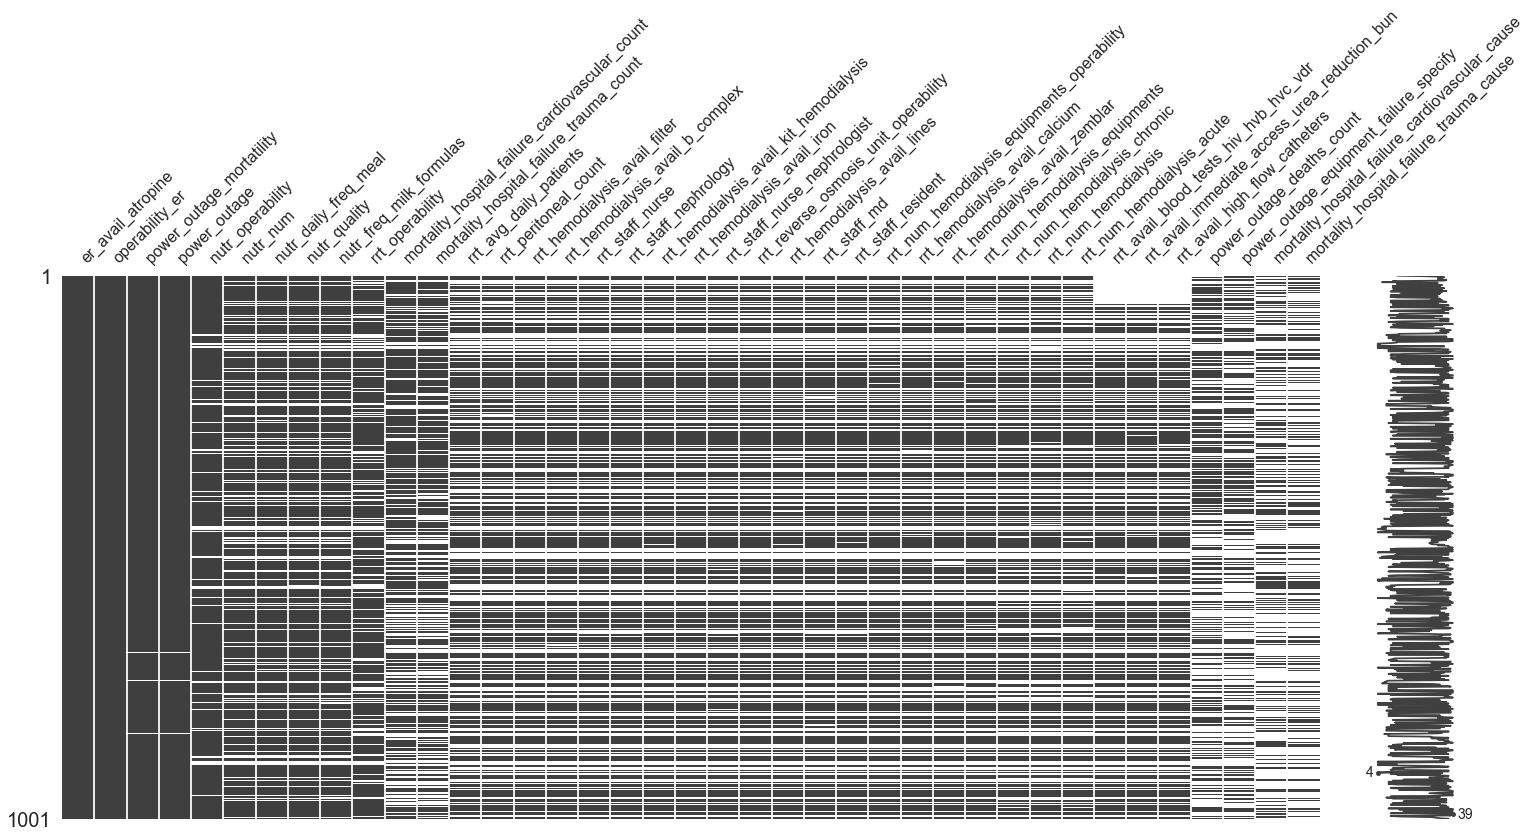

In [19]:
# Plot of patterns of missing values
#import missingno as msno
msno.matrix(df[missing])

In [20]:
df.to_csv('code_venezuela_processed.csv')

### Remove duplicate and save as new file

In [21]:
df.drop_duplicates().to_csv('code_venezuela_processed_duplicates_dropped.csv')

In [22]:
df = df.drop_duplicates()

In [23]:
#Check duplicates
duplicateRowsDF = df[df.duplicated()] 

In [24]:
duplicateRowsDF.to_csv('duplicates.csv')

In [25]:
df.duplicated()

timestamp
2019-05-31    False
2019-06-01    False
2019-06-03    False
2019-06-03    False
2019-06-03    False
              ...  
2020-02-14    False
2020-02-14    False
2020-02-14    False
2020-02-14    False
2020-02-14    False
Length: 1001, dtype: bool

### Tranforming strings to catagorial integers


In [26]:
df = df.replace("<3 days, no alternative support (tanks)",6)
df = df.replace("<3 days, with alternate support",5)
df = df.replace("3 to 5 days, no alternative support",4)
df = df.replace("3 to 5 days, with alternate support",3)
df = df.replace("There was no water any public day",2)
df = df.replace("There was water every day",1)

In [27]:
df.to_csv('final_data.csv')

In [28]:
df

,s_no,report_week,hospital_code,hospital_type,federal_entity,administrative_entity,power_outage_equipment_failure_specify,power_generator_available,power_outage_mortatility,power_outage_deaths_count,...,er_staff_non_professional_nurse_day_on_call,er_staff_residents_and_rural_night_on_call,er_staff_specialist_night_on_call,er_staff_mic_night_on_call,op_pavilions_count,er_staff_nurse_night_on_call,er_staff_non_professional_nurse_night_on_call,wash_failure_icu,wash_failure_er,wash_failure_sx
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-05-31,224,22 2019,DCA001,type III,Dtto Capital,MPPS,NaN,Works between 3 and 5 days,No,0.0,...,10,4,4,0,3,2,0,4,4,4
2019-06-01,524,22 2019,DCA005,type IV,Dtto Capital,IVSS,NaN,It works every day,No,0.0,...,0,16,4,0,3,12,2,3,3,3
2019-06-03,560,22 2019,GUA000,type IV,Guarico,MPPS,None,It works every day,Yes,0.0,...,0,12,6,1,4,5,0,1,1,1
2019-06-03,442,22 2019,ARA002,type IV,Aragua,"MPPS, Gob. State, Corposalud aragua",Infusion pump,Works between 3 and 5 days,Yes,NaN,...,5,10,2,3,2,10,0,3,3,3
2019-06-03,995,22 2019,POR000,type III,Portuguesa,MPPS,NaN,It works every day,Yes,NaN,...,2,1,1,4,33,2,2,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-14,699,5 of 2020,TAC000,type III,Tachira,IVSS,Blood Bank Refrigerator,It works every day,Yes,NaN,...,5,6,1,0,0,6,4,3,3,3
2020-02-14,696,6 2020,TAC000,type III,Tachira,IVSS,NaN,It works every day,Yes,NaN,...,5,6,1,0,0,5,5,5,5,5
2020-02-14,717,6 2020,TAC001,type IV,Tachira,Gob. State,NaN,It works every day,Yes,NaN,...,5,7,1,3,3,6,5,3,3,3
